# FINAL ASSESMENT PREDICTING WHATSAPP

This assignment is about a Group WhatsApp of a house with 12 residents. Each occupant is entitled to five years of living space in the house. After five years the occupant has to leave and is also removed from the WhatsApp group. This ensures that there is room for new younger boys to live in the house. The assignment consists of five parts. The first part is cleaning the data set in Excel. The second part consists of importing the data and cleaning the data in Jupyter Notebook. The third part of the assignment is the analysis of the data set. A general analysis that shows which group member is most active in the group and at which moments the group is most active. The fourth part will create a predictive model which is based on all the Group Members. The Naive Bayes model will predict which sentence fits which resident. The fifth and last part is about the evaluation of the model. 

# 1: Cleaning data in Excel


The data is uploaded out of the group settings of WhatsApp in a .csv file. 
The following changes made in Excel: 
- Different columns for Data/Time/Group Member/Message instead of one big column. 
- Deleted useless columns. 
- Deleted empty rows.
- 'send images' for members they send images. 
- Direct interactions changed in @'name'.

# 2: Import Data & Cleaning

In [30]:
#Import importing libraries:
import seaborn as sns #This is the plotting library.
import pandas as pd #"as pd" means using the abbreviation in commands.
import matplotlib.pyplot as plt #Setting the labels in the Seaborn graphs.
from sklearn.feature_extraction.text import CountVectorizer #For the general text analysis.
from sklearn.feature_extraction.text import TfidfVectorizer #For the general text analysis.
from sklearn.model_selection import train_test_split #Tool for test and train the model.
from sklearn.metrics import confusion_matrix #Confusion matrix.
from sklearn.naive_bayes import MultinomialNB #This library helps to make an prediction model, Naive Bayes.

In [31]:
df = pd.read_csv('WhatsappBHV5.csv', delimiter = ';')#I choose this delimiter because the messages in the data set has commas in it. 
df.head(10)

,Date,Time,Group_Member,Message
0,10/09/2018,10:04,Miguel Gonzalez,"Mannen, morgen is de huisvergadering om 19"
1,10/09/2018,11:50,Bart Stuyfzand,Wat gaan we als huisfoto doen
2,10/09/2018,11:50,Bart Stuyfzand,Want die moeten we voor de 14e al maken
3,10/09/2018,12:05,Miguel Gonzalez,Ik ben voor een normale huisfoto voor het huis
4,10/09/2018,12:05,Miguel Gonzalez,Maar als iemand dikke ideeën heeft...
5,10/09/2018,12:06,Bart Stuyfzand,Ik ben wel voor die foto met die tafel en dan...
6,10/09/2018,12:06,Timo Van De Wetering,Ik echt niet
7,10/09/2018,12:06,Bart Stuyfzand,Vgm was dat in het eerste jaar van Pim en Q
8,10/09/2018,12:06,Timo Van De Wetering,Die is saai man
9,10/09/2018,12:23,Quinten Naaijen,Ik normale huisfoto


In [32]:
#Inspecting the column names if there are deviations:
df.columns 

Index(['Date', 'Time ', 'Group_Member ', 'Message '], dtype='object')

Change the column names, delete the space after the column names:

In [33]:
#Change the column names, delete the space after the column names:
df = df.rename(columns={'Time ': 'Time'})
df = df.rename(columns={'Group_Member ': 'Group_Member'})
df = df.rename(columns={'Message ': 'Message'})
df.head(10)

,Date,Time,Group_Member,Message
0,10/09/2018,10:04,Miguel Gonzalez,"Mannen, morgen is de huisvergadering om 19"
1,10/09/2018,11:50,Bart Stuyfzand,Wat gaan we als huisfoto doen
2,10/09/2018,11:50,Bart Stuyfzand,Want die moeten we voor de 14e al maken
3,10/09/2018,12:05,Miguel Gonzalez,Ik ben voor een normale huisfoto voor het huis
4,10/09/2018,12:05,Miguel Gonzalez,Maar als iemand dikke ideeën heeft...
5,10/09/2018,12:06,Bart Stuyfzand,Ik ben wel voor die foto met die tafel en dan...
6,10/09/2018,12:06,Timo Van De Wetering,Ik echt niet
7,10/09/2018,12:06,Bart Stuyfzand,Vgm was dat in het eerste jaar van Pim en Q
8,10/09/2018,12:06,Timo Van De Wetering,Die is saai man
9,10/09/2018,12:23,Quinten Naaijen,Ik normale huisfoto


In [34]:
#Lower Casing. Convert the text into the lower casing so that ‘apple’, ‘Apple’ and ‘APPLE’ are treated the same way.
df['Message']  = df['Message'].str.lower()
df['Message'].head()

0         mannen, morgen is de huisvergadering om 19
1                      wat gaan we als huisfoto doen
2            want die moeten we voor de 14e al maken
3     ik ben voor een normale huisfoto voor het huis
4              maar als iemand dikke ideeën heeft...
Name: Message, dtype: object

In [35]:
#Removing punctuation.
df['Message'] = df['Message'].str.replace('[^\w\s]','')
df['Message'].head()

0          mannen morgen is de huisvergadering om 19
1                      wat gaan we als huisfoto doen
2            want die moeten we voor de 14e al maken
3     ik ben voor een normale huisfoto voor het huis
4                 maar als iemand dikke ideeën heeft
Name: Message, dtype: object

In [36]:
#This is the code for deleting emoticons in the data set:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
df.head(10)

,Date,Time,Group_Member,Message
0,10/09/2018,10:04,Miguel Gonzalez,mannen morgen is de huisvergadering om 19
1,10/09/2018,11:50,Bart Stuyfzand,wat gaan we als huisfoto doen
2,10/09/2018,11:50,Bart Stuyfzand,want die moeten we voor de 14e al maken
3,10/09/2018,12:05,Miguel Gonzalez,ik ben voor een normale huisfoto voor het huis
4,10/09/2018,12:05,Miguel Gonzalez,maar als iemand dikke ideeën heeft
5,10/09/2018,12:06,Bart Stuyfzand,ik ben wel voor die foto met die tafel en dan...
6,10/09/2018,12:06,Timo Van De Wetering,ik echt niet
7,10/09/2018,12:06,Bart Stuyfzand,vgm was dat in het eerste jaar van pim en q
8,10/09/2018,12:06,Timo Van De Wetering,die is saai man
9,10/09/2018,12:23,Quinten Naaijen,ik normale huisfoto


# 3: Data Analysis 

The table below shows how many times someone has sent a message in Group WhatsApp. Because I want to have insight into how often someone sent something.

In [37]:
df.style.set_properties(**{'text-align': 'right'}).set_table_styles([ dict(selector='th', props=[('text-align', 'right')] ) ])
df.head(10)

,Date,Time,Group_Member,Message
0,10/09/2018,10:04,Miguel Gonzalez,mannen morgen is de huisvergadering om 19
1,10/09/2018,11:50,Bart Stuyfzand,wat gaan we als huisfoto doen
2,10/09/2018,11:50,Bart Stuyfzand,want die moeten we voor de 14e al maken
3,10/09/2018,12:05,Miguel Gonzalez,ik ben voor een normale huisfoto voor het huis
4,10/09/2018,12:05,Miguel Gonzalez,maar als iemand dikke ideeën heeft
5,10/09/2018,12:06,Bart Stuyfzand,ik ben wel voor die foto met die tafel en dan...
6,10/09/2018,12:06,Timo Van De Wetering,ik echt niet
7,10/09/2018,12:06,Bart Stuyfzand,vgm was dat in het eerste jaar van pim en q
8,10/09/2018,12:06,Timo Van De Wetering,die is saai man
9,10/09/2018,12:23,Quinten Naaijen,ik normale huisfoto


In [38]:
df['Group_Member'].value_counts() #Select a column and with value_counts it calculates how often a group member occurs.

Pim Wevers                  2658
Bart Stuyfzand              2003
Quinten Naaijen             1711
Miguel Gonzalez             1354
Beerend Salamons            1084
Timo Van De Wetering        1076
Bob Dijkmans                1031
Sjoerd Kruik                 808
Thijmen Onderstal            739
Floris Haasnoot              587
Joep Linders                 547
Guus Beins                   389
Friso Rietra                 150
Christiaan Van Grafhorst      54
Name: Group_Member, dtype: int64

To get a better visualisation, the data will be plotted in a bar chart.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

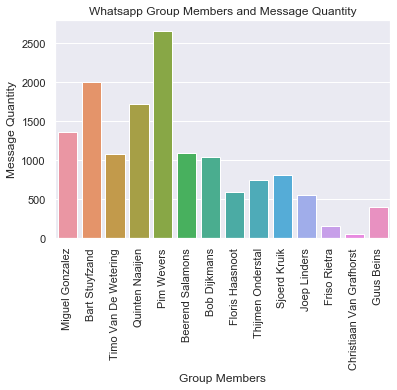

In [39]:
sns.set(style="darkgrid")#It is a style, can be different, depends what you like.
Chart1 = sns.countplot(x="Group_Member", data=df)#The seaborn countplot is for showing value counts for a single categorical variable.
plt.title('Whatsapp Group Members and Message Quantity')#Chart Title.
plt.xlabel('Group Members') #Name of the X axis.
plt.ylabel('Message Quantity') #Name of the Y axis.
plt.xticks(rotation=90)#Rotate the x axis with 90 degrees so it's fits.  

Pim Wevers has sent the most messages. This outcome is logic because of the years Pim lives in the house. Christiaan lives only four months in the house. Now I want to add a column which says how many years a person lives in the house to clarify more. 

In [40]:
df_years = pd.read_csv('Years.csv', delimiter = ';')#Another csv file with information about how many years a groupmember is live the stundent house.

In [41]:
df = df.merge(df_years)#Merge two csv files.

In [42]:
df.head(10)#Checking how the df is looking.

,Date,Time,Group_Member,Message,Years
0,10/09/2018,10:04,Miguel Gonzalez,mannen morgen is de huisvergadering om 19,6
1,10/09/2018,12:05,Miguel Gonzalez,ik ben voor een normale huisfoto voor het huis,6
2,10/09/2018,12:05,Miguel Gonzalez,maar als iemand dikke ideeën heeft,6
3,10/09/2018,12:51,Miguel Gonzalez,lotte van den brink vraagt of wij toevallig e...,6
4,10/09/2018,12:51,Miguel Gonzalez,ze is die kwijt,6
5,10/09/2018,12:52,Miguel Gonzalez,dan krijgen we wel echt een tebo foto,6
6,10/09/2018,12:52,Miguel Gonzalez,dat kiekje is top toch,6
7,10/09/2018,12:53,Miguel Gonzalez,ook prima,6
8,10/09/2018,12:57,Miguel Gonzalez,kan iemand daar even naar kijken die thuis is,6
9,10/09/2018,13:06,Miguel Gonzalez,top,6


In [43]:
df['Years'].value_counts() #Select a column and with value_counts it calculates wich year is most active.

5    4369
4    3079
6    2438
2    2165
3    1547
1     593
Name: Years, dtype: int64

Text(0, 0.5, 'Message Quantity')

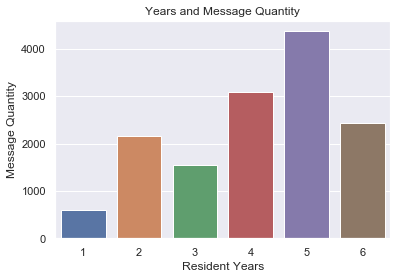

In [44]:
sns.set(style="darkgrid") #It is a style, can be different, depends what you like.
Chart2 = sns.countplot(x="Years", data=df)#The seaborn countplot is for showing value counts for a single categorical variable.
plt.title('Years and Message Quantity')#Chart Title.
plt.xlabel('Resident Years')#Name of the X axis.
plt.ylabel('Message Quantity')#Name of the Y axis.

The chart above shows that residents who have been residents for five years and are still in the Group WhatsApp are the most active in the group WhatsApp. As opposed to the first years who only lived in the house for four months. 

Next step is at when the group WhatsApp is most active looking at a 24-hour scale.

In [45]:
df['Time'].value_counts()#Select a column and with value_counts it calculates wich year is most active.

18:11    51
14:16    51
12:00    50
12:53    50
12:33    45
         ..
07:54     1
06:22     1
08:03     1
06:39     1
08:08     1
Name: Time, Length: 1137, dtype: int64

Text(0, 0.5, 'Message Quantity')

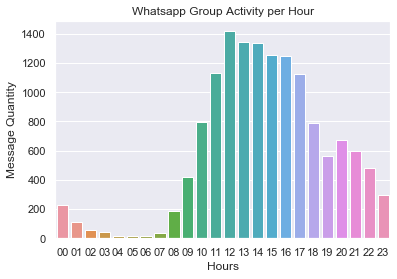

In [46]:
df['Hour'] = df['Time'].str.split(':').str[0]#Create a new column called Hour. Only interested in the first two digits, split them on ':' and pick the first part with [0].
Chart3 = sns.countplot(x="Hour", data=df)#The seaborn countplot is for showing value counts for a single categorical variable.
sns.set(style="darkgrid") #It is a style, can be different, depends what you like.
plt.title('Whatsapp Group Activity per Hour')#Chart Title.
plt.xlabel('Hours')#Name of the X axis.
plt.ylabel('Message Quantity')#Name of the Y axis.


The Group App is most used from 12:00 to 12:59. An outlier is from 19:00 to 19:59. This is around dinnertime, and you should not sit on the phone while eating. So that makes sense.

In [47]:
df.head()#Dataframe with the new variables.

,Date,Time,Group_Member,Message,Years,Hour
0,10/09/2018,10:04,Miguel Gonzalez,mannen morgen is de huisvergadering om 19,6,10
1,10/09/2018,12:05,Miguel Gonzalez,ik ben voor een normale huisfoto voor het huis,6,12
2,10/09/2018,12:05,Miguel Gonzalez,maar als iemand dikke ideeën heeft,6,12
3,10/09/2018,12:51,Miguel Gonzalez,lotte van den brink vraagt of wij toevallig e...,6,12
4,10/09/2018,12:51,Miguel Gonzalez,ze is die kwijt,6,12


# 4: Naïve bayes model

This part is about text mining. Using the Naive Bayes technique, predicting which message is sent by which Group Member.

Naive Bayes Classification is a kind of algorithm that applies Bayes' Law. The Bayes Law indicates the probability of an event. When you use the Naive Bayes Classification, you use the Bayes Law to judge whether something is probable and you come to an assumption that is the most obvious.

Insight in the vocabulary of the WhatsApp Group:

In [48]:
text = df['Message'].values.astype('U') #Taking the text from the messages to convert it to Unicode.
vect = CountVectorizer()#Create the count vectorizer object object.
vect = vect.fit(text)#Fit the model with the words from the review text.
docu_feat = vect.transform(text)#Get the words from the vocabulary.


In [49]:
feature_names = vect.get_feature_names() #Get all separate words from the reviews.
print(f"There are {len(feature_names)} words in the vocabulary. A selection: {feature_names[1000:1100]}") #Some words from word 1000 till word 1100.

There are 6379 words in the vocabulary. A selection: ['br', 'braakles', 'brace', 'brainstormen', 'brak', 'brakke', 'brakkk', 'bram', 'brand', 'brandalarm', 'brandblussers', 'brandenburg', 'brandmelder', 'brandoefening', 'brandtrap', 'brandweer', 'brazzers', 'breda', 'breed', 'breedstraat', 'breek', 'breekt', 'breken', 'breng', 'brengen', 'brengt', 'bretels', 'breukelen', 'brief', 'briefje', 'briefjeappje', 'briefjes', 'briene', 'brieven', 'brievenbus', 'bril', 'brink', 'brinkman', 'bro', 'broeder', 'broek', 'broer', 'broers', 'broertje', 'brommers', 'bron', 'brood', 'broodje', 'broodjes', 'brrrrrrrrrrak', 'bruine', 'bruinefruit', 'brussel', 'brussels', 'brutels', 'bruur', 'btw', 'budget', 'bueno', 'buffer', 'buffet', 'buffetje', 'bui', 'buik', 'buis', 'buiten', 'buitenband', 'buitenbezem', 'buitenland', 'buizen', 'buj', 'bull', 'bullen', 'bultje', 'bunkerrr', 'bureau', 'bureaus', 'buren', 'burgers', 'burghard', 'buro', 'bus', 'bushalte', 'business', 'busje', 'busjes', 'busplek', 'busse

The following code will predict the character of lines of dialogue from the oldest residents in the house. This is the code to generate a document-feature matrix.

In [50]:
df = df.loc[(df['Group_Member'] == 'Miguel Gonzalez') | (df['Group_Member'] == 'Beerend Salamons') | (df['Group_Member'] == 'Pim Wevers') | (df['Group_Member'] == 'Quinten Naaijen') | (df['Group_Member'] == 'Timo van de Wetering') | (df['Group_Member'] == 'Bart Stuyfzand') | (df['Group_Member'] == 'Sjoerd Kruik') | (df['Group_Member'] == 'Thijmen Onderstal') | (df['Group_Member'] == 'Bob Dijkmans') | (df['Group_Member'] == 'Floris Haasnoot') | (df['Group_Member'] == 'Joep Linders') | (df['Group_Member'] == 'Friso Rietra') | (df['Group_Member'] == 'Christiaan van Grafhorst') | (df['Group_Member'] == 'Guus Beins')]#Select two names in the column Group_Member.
text = df['Message'].values.astype('U') #Taking the text from the data frame. We need to convert it to Unicode.
vect = CountVectorizer() #Create the count vectorizer object object.
vect = vect.fit(text) #We fit the model with the words from the review text.
docu_feat = vect.transform(text) #Make a matrix.
df.head()

,Date,Time,Group_Member,Message,Years,Hour
0,10/09/2018,10:04,Miguel Gonzalez,mannen morgen is de huisvergadering om 19,6,10
1,10/09/2018,12:05,Miguel Gonzalez,ik ben voor een normale huisfoto voor het huis,6,12
2,10/09/2018,12:05,Miguel Gonzalez,maar als iemand dikke ideeën heeft,6,12
3,10/09/2018,12:51,Miguel Gonzalez,lotte van den brink vraagt of wij toevallig e...,6,12
4,10/09/2018,12:51,Miguel Gonzalez,ze is die kwijt,6,12


 The model will use the Naïve Bayes classifier from sklearn.

In [51]:
nb = MultinomialNB() #Create the model based on the Naive Bayes technique. 
X = docu_feat #The document-feature matrix is the X matrix.
y = df['Group_Member'] #Creating the y vector.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #Split the data into training set and test set (30%) and store it.

nb = nb.fit(X_train, y_train) #Fit the model X=features, y=character.

In machine learning it is usual to split the data into two subsets: training data and testing data. There are two risks, the model is overfitting or the model is underfitting. Overfitting means that the model has trained “too well” and is now fit too tightly to the training dataset. This usually happens when the model is too complicated. In contrast to overfitting, when a model is under fitted, it means that the model does not fit the training data and therefore misses the trends in the data.

# 5: Evaluation 

Evaluation of the model will be done with calculating the confusion matrix, accuracy, precision and recall.

In [52]:
#Evaluate the model with the Accuracy:
y_test_p = nb.predict(X_test)
nb.score(X_test, y_test)

0.2750701709619801

$Accuracy = \frac{Correct}{Total} * 100 $

The accuracy is 27.6%, which is not great. Now check the same category all the time.

In [53]:
df['Group_Member'].value_counts(normalize=True)#It selects now only Pim and Quinten in the column Gourp_Member. 

Pim Wevers           0.203507
Bart Stuyfzand       0.153357
Quinten Naaijen      0.131001
Miguel Gonzalez      0.103667
Beerend Salamons     0.082995
Bob Dijkmans         0.078937
Sjoerd Kruik         0.061864
Thijmen Onderstal    0.056581
Floris Haasnoot      0.044943
Joep Linders         0.041880
Guus Beins           0.029783
Friso Rietra         0.011485
Name: Group_Member, dtype: float64

The model is making 7.3 percentage points better than when Pim is guessed all the time. This is not great but logic with such short lines of dialogue.

Evalute the model with a confusion matrix

In [54]:
nb.classes_ #With nb_classes figureing out the ordering of the labels.

array(['Bart Stuyfzand', 'Beerend Salamons', 'Bob Dijkmans',
       'Floris Haasnoot', 'Friso Rietra', 'Guus Beins', 'Joep Linders',
       'Miguel Gonzalez', 'Pim Wevers', 'Quinten Naaijen', 'Sjoerd Kruik',
       'Thijmen Onderstal'], dtype='<U17')

In [55]:
cm = confusion_matrix(y_test, y_test_p)#Make a confusion matrix. 
cm = pd.DataFrame(cm, index=['Bart_real', 'Beerend_real', 'Bob_real', 'Floris_real', 'Friso_real', 'Guus_real', 'Joep_real', 'Miguel_real', 'Pim_real', 'Quinten_real', 'Sjoerd_real', 'Thijmen_real'], columns=['Bart_predict', 'Beerend_predict', 'Bob_predict', 'Floris_predict', 'Friso_predict', 'Guus_predict', 'Joep_predict', 'Miguel_predict', 'Pim_predict', 'Quinten_predict', 'Sjoerd_predict', 'Thijmen_predict'])#Make column names for the confusion matrix. 
cm

,Bart_predict,Beerend_predict,Bob_predict,Floris_predict,Friso_predict,Guus_predict,Joep_predict,Miguel_predict,Pim_predict,Quinten_predict,Sjoerd_predict,Thijmen_predict
Bart_real,231,31,7,1,0,0,1,32,258,60,5,1
Beerend_real,60,60,5,0,0,0,0,28,132,34,2,1
Bob_real,72,28,35,1,0,0,0,26,111,58,1,0
Floris_real,25,14,13,1,0,0,0,23,64,24,3,1
Friso_real,14,7,1,0,0,0,0,6,14,7,0,0
Guus_real,19,15,6,0,0,0,0,11,39,15,0,0
Joep_real,35,4,10,1,0,0,8,11,75,17,2,1
Miguel_real,59,29,7,0,0,0,0,87,151,47,3,1
Pim_real,112,34,8,0,0,0,2,59,508,87,5,1
Quinten_real,69,31,9,2,0,0,0,39,205,140,4,0


The confusion matrix  results in the following results: 
- 231 times it was well predicted that Bart sent a text message. 
- 396 times it was wrong.


Precision and recall:

- Precision is the proportion of the "Bart" predictions that is actually "Bart".
- Recall is the proportion of real "Bart" that is predicted as "Bart"

Calculate the precision and recall:

In [27]:
from sklearn.metrics import classification_report #Import classification_report
print(classification_report(y_test, y_test_p, nb.classes_)) #This function needs the class names, which are in nb.classes_.

                   precision    recall  f1-score   support

   Bart Stuyfzand       0.30      0.33      0.32       631
 Beerend Salamons       0.17      0.18      0.18       319
     Bob Dijkmans       0.22      0.13      0.16       288
  Floris Haasnoot       0.25      0.01      0.01       190
     Friso Rietra       0.00      0.00      0.00        39
       Guus Beins       0.00      0.00      0.00       116
     Joep Linders       0.56      0.06      0.11       153
  Miguel Gonzalez       0.28      0.23      0.26       392
       Pim Wevers       0.29      0.68      0.41       803
  Quinten Naaijen       0.28      0.25      0.26       530
     Sjoerd Kruik       0.31      0.02      0.03       236
Thijmen Onderstal       0.25      0.01      0.02       222

         accuracy                           0.28      3919
        macro avg       0.24      0.16      0.15      3919
     weighted avg       0.27      0.28      0.23      3919



/Users/quintennaayen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
print(df.iloc[0,3])#Slecting the column. 
print(nb.predict_proba(X[0]))

 mannen morgen is de huisvergadering om 19
[[1.72230845e-01 7.74632133e-04 1.72895667e-02 1.28108644e-03
  1.15178971e-06 4.09302585e-04 5.31323588e-03 5.13052415e-01
  2.10678633e-01 7.26907573e-02 2.90571569e-03 3.37265770e-03]]


Because of the double square brackets, the code gives a matrix of the size, 1x2. Now the code will dive into more messages. The array is two-dimensional (see the brackets). The following code will predict the probability of a send a message by each of the Group Members in percentages.

In [29]:
for i in range(11): #Select 11 messages.
    prob = nb.predict_proba(X[i])
    print(f"Message: {i}. {df.iloc[i,3]}") #Print the message.
    print(f"Bart: {prob[0,0]}, Beerend: {prob[0,1]}, Bob: {prob[0,2]}, Floris: {prob[0,3]}, Friso: {prob[0,4]}, Guus: {prob[0,5]}, Joep: {prob[0,6]}, Miguel: {prob[0,7]}, Pim: {prob[0,8]}, Quinten: {prob[0,9]}, Sjoerd: {prob[0,10]}, Thijmen: {prob[0,11]}") #Print the Group_Members with probability.

    

Message: 0.  mannen morgen is de huisvergadering om 19
Bart: 0.17223084541860098, Beerend: 0.0007746321327470985, Bob: 0.017289566736482843, Floris: 0.0012810864371524244, Friso: 1.151789707079279e-06, Guus: 0.00040930258476500986, Joep: 0.005313235879518407, Miguel: 0.5130524153075476, Pim: 0.21067863302548204, Quinten: 0.07269075729771392, Sjoerd: 0.0029057156905143607, Thijmen: 0.0033726576997670224
Message: 1.  ik ben voor een normale huisfoto voor het huis
Bart: 0.15622792342778227, Beerend: 0.01587504762580733, Bob: 0.03883623634436291, Floris: 0.0019823305116014665, Friso: 2.5343885558008464e-07, Guus: 0.00033314217169006665, Joep: 0.0015120879336924758, Miguel: 0.5181057960900645, Pim: 0.1769023753991702, Quinten: 0.07877372815007291, Sjoerd: 0.010463582046491178, Thijmen: 0.0009874968604070527
Message: 2.  maar als iemand dikke ideeën heeft
Bart: 0.09345009001151594, Beerend: 0.010269869776910056, Bob: 0.019931046443729374, Floris: 0.0033175525905274903, Friso: 2.2257728956127